In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("data/final_df.pkl")

In [3]:
# We decide to remove the item_trades for an analysis on the item_crops to avoid duplicates
df_crops = df.drop(['item_trades', 'export_v', 'export_q', 'import_v', 'import_q'], axis=1).drop_duplicates()

In [4]:
df_2016 = df_crops[df_crops.year==2016]
df_1961 = df_crops[df_crops.year==1961]

In [5]:
df_crops.head(3)

,area_code,area_crops,item_crops,year,area_harvested,production,yield,hs12_code,parent_group,child_group,parent_description,child_description
0,1,Armenia,Wheat,1992,65500.0,141483.0,21600.0,100111,10,1001,Cereals,Wheat and meslin
1,1,Armenia,Wheat,1993,97900.0,217900.0,22257.0,100111,10,1001,Cereals,Wheat and meslin
3,1,Armenia,Wheat,1994,85697.0,152900.0,17842.0,100111,10,1001,Cereals,Wheat and meslin


In [6]:
df_crops.item_crops.nunique()

125

In [7]:
# Countries
countries = df_crops.area_crops.unique()

In [8]:
# Rank countries
df_crops.groupby(['area_crops', 'area_code', 'year']).sum()

area_harvested  production      yield
area_crops  area_code year                                       
Afghanistan 2         1961       6933739.0   8491473.0   884228.0
                      1962       7156590.0   8506573.0   878654.0
                      1963       7157440.0   7919773.0   892562.0
                      1964       7211010.0   8735560.0   986156.0
                      1965       7222200.0   8921760.0  1018809.0
...                                    ...         ...        ...
Zimbabwe    181       2013       4340473.0   4185714.0  2853526.0
                      2014       3613056.0   4291655.0  2782044.0
                      2015       3519812.0   3388545.0  2587166.0
                      2016       4372424.0   3973117.0  2562953.0
                      2017       4275269.0   4066000.0  2535935.0

[12588 rows x 3 columns]

In [9]:
# Rank crops
df_crops.groupby('area_crops').sum()

,area_code,year,area_harvested,production,yield
area_crops,,,,,
Afghanistan,2938,2924409,3.518493e+08,5.875219e+08,75832916.0
Africa,31380300,12238663,1.424796e+10,3.435675e+10,351132923.0
Albania,4908,3268814,2.595804e+07,1.216131e+08,167564898.0
Algeria,11304,5626263,3.822382e+08,8.134551e+08,169551278.0
American Samoa,1950,775668,2.509810e+05,7.093590e+05,12841481.0
...,...,...,...,...,...
World,34910000,13883894,1.246644e+11,4.331248e+11,674826695.0
Yemen,445710,3570292,1.113600e+08,1.762279e+08,116114448.0
Yugoslav SFR,353896,2821289,3.588162e+08,1.404725e+09,69070211.0


In [10]:
# Time analysis

Ideas
- Tobacco
- Wine / Grapes

### Number of countries per crops

Attention : biased because 'World' (and others) is included in the countries

In [11]:
# Count nb of countries in which products are produced
df_crops.groupby(['item_crops', 'year']).area_crops.nunique()

item_crops           year
Almonds, with shell  1961     27
                     1962     27
                     1963     27
                     1964     27
                     1965     27
                            ... 
Wheat                2013    156
                     2014    153
                     2015    155
                     2016    156
                     2017    125
Name: area_crops, Length: 7106, dtype: int64

In [12]:
# Count nb of countries in which products are produced in 1961
df_1961.groupby(['item_crops']).area_crops.nunique().sort_values(ascending=False).reset_index(name='#countries').head(10)

,item_crops,#countries
0,Vegetables Primary,205
1,"Vegetables, fresh nes",197
2,Cereals (Rice Milled Eqv),173
3,"Roots and Tubers,Total",171
4,Maize,169
5,Tomatoes,155
6,Potatoes,152
7,"Tobacco, unmanufactured",144
8,"Rice, paddy",139
9,"Onions, dry",132


In [13]:
# Count nb of countries in which products are produced in 2017
df_2016.groupby(['item_crops']).area_crops.nunique().sort_values(ascending=False).reset_index(name='#countries').head(10)

,item_crops,#countries
0,Vegetables Primary,232
1,"Vegetables, fresh nes",228
2,Cereals (Rice Milled Eqv),213
3,"Roots and Tubers,Total",209
4,Tomatoes,202
5,Maize,197
6,Potatoes,190
7,"Fruit, fresh nes",188
8,Cabbages and other brassicas,175
9,"Onions, dry",165


**Could be interesting:**
- fruit

### Yield per crops

In [14]:
# Sum yield on which products are produced in 1961
crop_yield_1961 = df_1961[df_1961.area_crops=='World']\
                        .groupby(['item_crops'])['yield']\
                        .sum()\
                        .sort_values(ascending=False)\
                        .reset_index(name='total_yield')

In [15]:
# Sum yield on which products are produced in 2016
crop_yield_2016 = df_2016[df_2016.area_crops=='World']\
                        .groupby(['item_crops'])['yield']\
                        .sum()\
                        .sort_values(ascending=False)\
                        .reset_index(name='total_yield')

In [16]:
comp_crop_yield = crop_yield_1961\
                    .merge(crop_yield_2016, how='outer', on=['item_crops'], suffixes=['_1961', '_2016'])

In [17]:
comp_crop_yield['diff'] = comp_crop_yield['total_yield_2016']-comp_crop_yield['total_yield_1961']

In [18]:
comp_crop_yield.sort_values('diff', ascending=False)

,item_crops,total_yield_1961,total_yield_2016,diff
0,Mushrooms and truffles,1678397.0,3702230.0,2023833.0
4,Sugar beet,231735.0,605397.0,373662.0
27,Cucumbers and gherkins,94308.0,362965.0,268657.0
30,Watermelons,91267.0,333436.0,242169.0
8,Tomatoes,164346.0,370488.0,206142.0
...,...,...,...,...
2,Currants,393254.0,54814.0,-338440.0
1,Maté,525751.0,38607.0,-487144.0
39,Peppermint,82976.0,NaN,NaN
116,Fibre Crops Primary,3892.0,NaN,NaN


### Area harvested

In [19]:
#TODO sort countries by area for crops

In [26]:
crop_area_1961 = df_1961[df_1961.area_crops=='World']\
                        .groupby(['item_crops'])['area_harvested']\
                        .sum()\
                        .sort_values(ascending=False)\
                        .reset_index(name='total_area')

crop_area_2016 = df_2016[df_2016.area_crops=='World']\
                        .groupby(['item_crops'])['area_harvested']\
                        .sum()\
                        .sort_values(ascending=False)\
                        .reset_index(name='total_area')

comp_crop_area = crop_area_1961\
                    .merge(crop_area_2016, how='outer', on=['item_crops'], suffixes=['_1961', '_2016'])

In [27]:
comp_crop_area

,item_crops,total_area_1961,total_area_2016
0,Cereals (Rice Milled Eqv),647997350.0,733340825.0
1,"Coarse Grain, Total",328422765.0,347868958.0
2,Wheat,204209450.0,220252643.0
3,"Rice, paddy",115365135.0,165219224.0
4,Maize,105559708.0,195363162.0
...,...,...,...
120,Maté,5300.0,259900.0
121,Blueberries,3023.0,116375.0
122,Mushrooms and truffles,2950.0,26524.0
123,"Brazil nuts, with shell",1800.0,11897.0


In [28]:
comp_crop_area['diff'] = comp_crop_area['total_area_2016']-comp_crop_area['total_area_1961']
comp_crop_area['ratio_diff_1961'] = comp_crop_area['diff']/comp_crop_area['total_area_2016']

In [29]:
total_area_world_2016 = df_2016[df_2016.area_crops=='World'].area_harvested.sum()
total_area_world_1961 = df_1961[df_1961.area_crops=='World'].area_harvested.sum()
avg_increase = (total_area_world_2016 - total_area_world_1961)/ total_area_world_1961
avg_increase

0.2603766948959538

In [30]:
# This allows to see how much the increase is different from the global one
comp_crop_area['ratio_diff_global'] = comp_crop_area['diff']/avg_increase

In [31]:
comp_crop_area.sort_values('diff', ascending=False).head(5)

,item_crops,total_area_1961,total_area_2016,diff,ratio_diff_1961,ratio_diff_global
12,Soybeans,23818820.0,121848237.0,98029417.0,0.804521,3.764907e+08
4,Maize,105559708.0,195363162.0,89803454.0,0.459674,3.448982e+08
0,Cereals (Rice Milled Eqv),647997350.0,733340825.0,85343475.0,0.116376,3.277693e+08
3,"Rice, paddy",115365135.0,165219224.0,49854089.0,0.301745,1.914691e+08
15,Vegetables Primary,21152288.0,57694664.0,36542376.0,0.633375,1.403443e+08


In [32]:
comp_crop_area.sort_values('diff', ascending=False).tail(8)

,item_crops,total_area_1961,total_area_2016,diff,ratio_diff_1961,ratio_diff_global
23,Linseed,7505107.0,2748483.0,-4756624.0,-1.730636,-1.826824e+07
5,Barley,54518640.0,47661470.0,-6857170.0,-0.143872,-2.633558e+07
8,Millet,43401259.0,31565003.0,-11836256.0,-0.374980,-4.545820e+07
11,Rye,30254816.0,4482238.0,-25772578.0,-5.749935,-9.898189e+07
10,Oats,38260751.0,9545842.0,-28714909.0,-3.008106,-1.102822e+08
9,Fibre Crops Primary,38730307.0,NaN,NaN,NaN,NaN
117,Peppermint,12969.0,NaN,NaN,NaN,NaN
124,Triticale,NaN,4234298.0,NaN,NaN,NaN


In [33]:
comp_crop_area.sort_values('ratio_diff_1961', ascending=False).head(5)

,item_crops,total_area_1961,total_area_2016,diff,ratio_diff_1961,ratio_diff_global
120,Maté,5300.0,259900.0,254600.0,0.979608,9.778141e+05
121,Blueberries,3023.0,116375.0,113352.0,0.974024,4.353385e+05
112,"Nuts, nes",33849.0,712075.0,678226.0,0.952464,2.604788e+06
111,Pistachios,35393.0,693380.0,657987.0,0.948956,2.527058e+06
119,Currants,7683.0,120728.0,113045.0,0.936361,4.341594e+05


In [34]:
comp_crop_area.sort_values('ratio_diff_1961', ascending=False).tail(8)

,item_crops,total_area_1961,total_area_2016,diff,ratio_diff_1961,ratio_diff_global
23,Linseed,7505107.0,2748483.0,-4756624.0,-1.730636,-1.826824e+07
37,"Grain, mixed",3059440.0,1000495.0,-2058945.0,-2.057926,-7.907563e+06
10,Oats,38260751.0,9545842.0,-28714909.0,-3.008106,-1.102822e+08
11,Rye,30254816.0,4482238.0,-25772578.0,-5.749935,-9.898189e+07
41,Flax fibre and tow,2041125.0,222031.0,-1819094.0,-8.192973,-6.986393e+06
9,Fibre Crops Primary,38730307.0,NaN,NaN,NaN,NaN
117,Peppermint,12969.0,NaN,NaN,NaN,NaN
124,Triticale,NaN,4234298.0,NaN,NaN,NaN


**Conclusion:** 

Primary items for which the area has most increased from 1961 to 2017
- Cereals (Rice Milled Eqv)
- Maize
- Soybeans
- Rice, paddy
- Vegetables Primary

Primary items for which the area has most decreased from 1961 to 2017
- Coarse Grain, Total
- Oats
- Rye
- Barley
- Millet

Primary items for which the area has most increased from 1961 to 2017, scale to the original quantity in 1961
- Maté
- Blueberries
- Pistachios
- Nuts, nes
- Currants

Primary items for which the area has most decreased from 1961 to 2017, scale to the original quantity in 1961
- Flax fibre and tow
- Rye
- Oats
- Grain, mixed
- Linseed

### Focus on a particular item 

In [35]:
def plot_by_year(item, sum_column):
    y_axis_name = sum_column+'_sum'
    
    item_df = df[df.item_crops == item]
    
    #areas_item = item_df.groupby('year')[sum_column].sum().reset_index(name=y_axis_name)
    areas_item = item_df[item_df.area_crops=='World'].groupby('year')[sum_column].sum().reset_index(name=y_axis_name)
    
    sns.set_style('whitegrid')
    plt.figure(figsize=(20, 5))

    g = sns.barplot(x='year', y=y_axis_name, data=areas_item, color='salmon')
    g.set_title(item + ': ' + sum_column)
    plt.xticks(rotation=90);

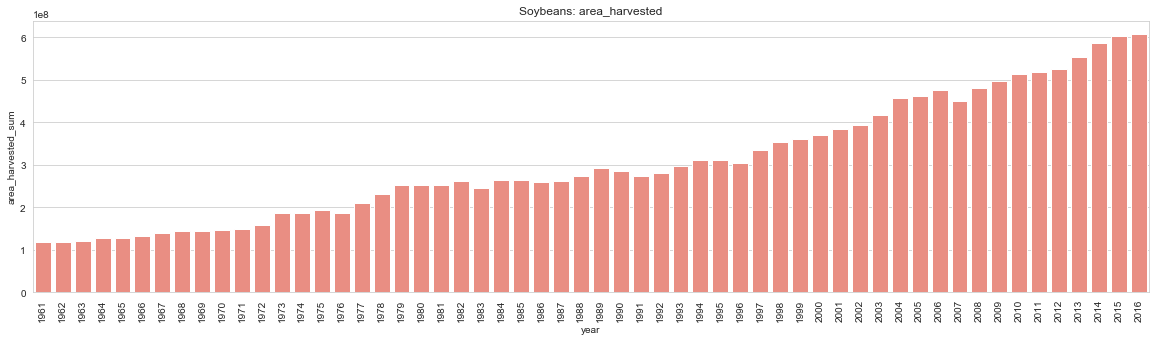

In [36]:
plot_by_year('Soybeans', 'area_harvested')

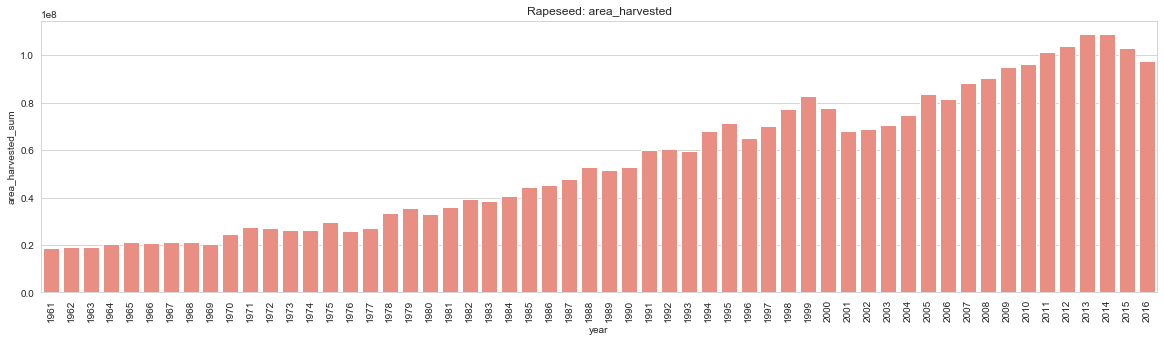

In [37]:
plot_by_year('Rapeseed', 'area_harvested')

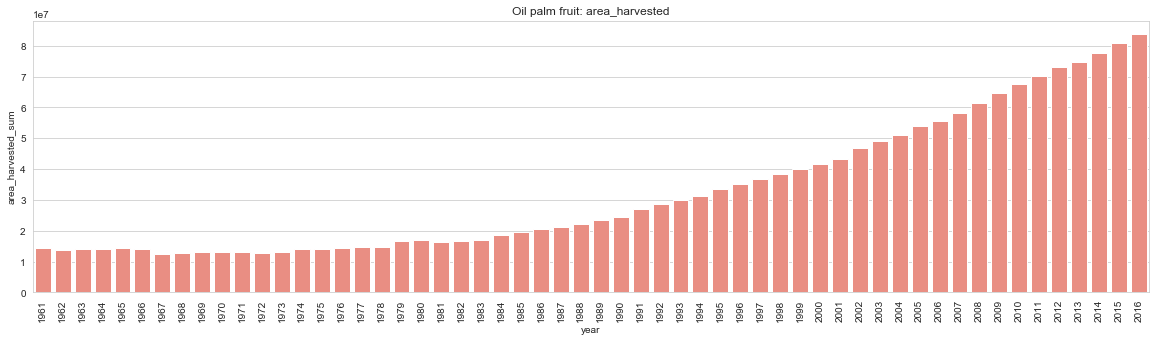

In [38]:
plot_by_year('Oil palm fruit', 'area_harvested')

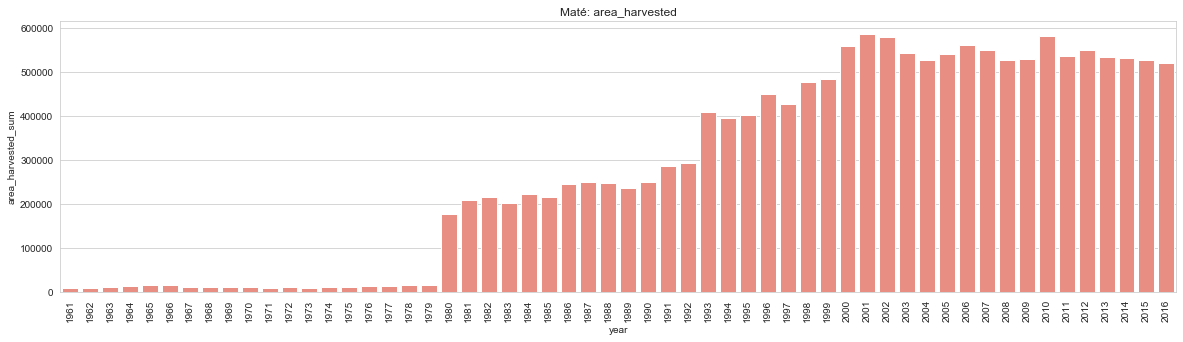

In [39]:
plot_by_year('Maté', 'area_harvested')

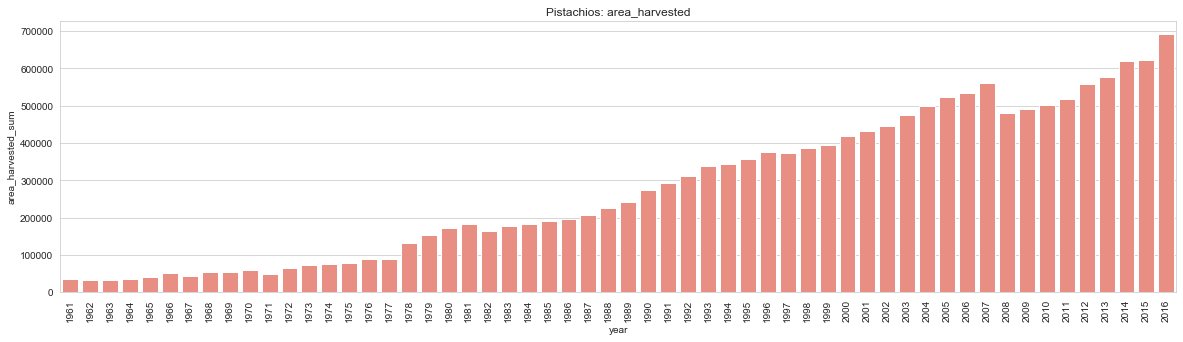

In [40]:
plot_by_year('Pistachios', 'area_harvested')

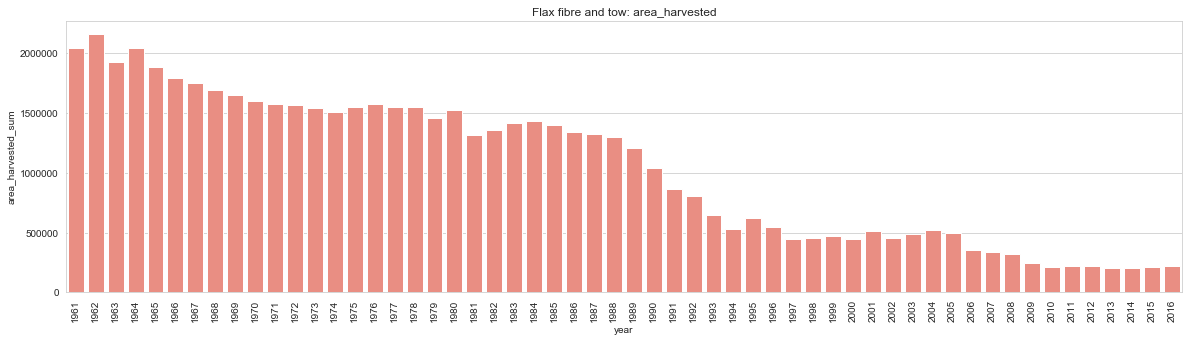

In [41]:
plot_by_year('Flax fibre and tow', 'area_harvested')

**Conclusion:**

- Argentina is a new producer for Maté in 1980 
- Brazil is a new producer for Maté in 1981

Check if Argentina is simply absent from the dataset before 1980

In [42]:
df_crops[df_crops.area_crops=='Argentina'].year.unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

Argentina is present for all years

In [43]:
df_crops[df_crops.area_crops=='Argentina'].groupby('year').item_crops.nunique();

Sudden increase of nb of items for Argentina >> seems weird (in 1980 and 1985 for ex).

In [44]:
# Idea : keep only combinations (item, countries) which appear in each year

### Countries irregularities

In [45]:
def countries_diff(item):
    item_df = df_crops[(df_crops.item_crops==item)]
    
    cntry_set = set(item_df[item_df.year==1961].area_crops.unique())
    
    diff_dict = {}
    
    for y in item_df.year.unique():
        new_cntry_set = set(item_df[item_df.year==y].area_crops.unique())
        if new_cntry_set - cntry_set:
            diff_dict[y] = new_cntry_set - cntry_set
        cntry_set = new_cntry_set
        
    return diff_dict

#### Check Maté countries

In [46]:
countries_diff('Maté')

{1980: {'Argentina'},
 1981: {'Brazil'},
 1961: {'Americas',
  'Land Locked Developing Countries',
  'South America',
  'World'}}

In [47]:
# Check first time Argentina appears
df_crops.loc[(df_crops.item_crops=='Maté') & (df_crops.area_crops=='Argentina') & (df_crops.year==1980)]

,area_code,area_crops,item_crops,year,area_harvested,production,yield,hs12_code,parent_group,child_group,parent_description,child_description
24023,9,Argentina,Maté,1980,79344.0,134813.0,16991.0,090300,09,0903,"Coffee, tea, mate and spices",Mate


**Conclusion:**
First time Argentina is a producer of Maté, the production value is already very high ! Probably not relevant.

#### Check countries in general

In [48]:
df_crops.groupby('area_crops').nunique().sort_values('item_crops', ascending=False).item_crops.reset_index(name='#countries')

,area_crops,#countries
0,World,125
1,Asia,120
2,Net Food Importing Developing Countries,119
3,Americas,118
4,Land Locked Developing Countries,117
...,...,...
239,Tuvalu,3
240,British Virgin Islands,2
241,Faroe Islands,2
242,Saint Pierre and Miquelon,2


In [49]:
# Macau has only one crop > curious about what it could be !
df_crops[df_crops.area_crops=='China, Macao SAR'].item_crops.unique()

array(['Pepper (piper spp.)'], dtype=object)

#### Check Palm Oil fruit countries

In [50]:
countries_diff('Oil palm fruit')

{1968: {'Nicaragua'},
 1970: {'Peru'},
 1971: {'Papua New Guinea'},
 1973: {'Madagascar'},
 1974: {'Suriname'},
 1980: {'Venezuela (Bolivarian Republic of)'},
 1983: {'Guatemala'},
 1985: {'China', 'China, mainland', 'Eastern Asia'},
 1988: {'Suriname'},
 1989: {'Caribbean', 'Dominican Republic'},
 1991: {'Cambodia'},
 1995: {'Guinea'},
 1996: {'Ghana'},
 1997: {'Panama'},
 1999: {'Gambia'},
 2014: {'Guinea-Bissau'}}

In [51]:
# Check first time Argentina appears
df_crops.loc[(df_crops.item_crops=='Oil palm fruit') & (df_crops.area_crops=='Nicaragua') & (df_crops.year==1968)]

,area_code,area_crops,item_crops,year,area_harvested,production,yield,hs12_code,parent_group,child_group,parent_description,child_description
446193,157,Nicaragua,Oil palm fruit,1968,1050.0,9000.0,85714.0,NaN,NaN,NaN,NaN,NaN


In [52]:
df_crops.loc[(df_crops.item_crops=='Oil palm fruit') & (df_crops.area_crops=='Peru') & (df_crops.year==1970)]

,area_code,area_crops,item_crops,year,area_harvested,production,yield,hs12_code,parent_group,child_group,parent_description,child_description
484784,170,Peru,Oil palm fruit,1970,31.0,278.0,89677.0,NaN,NaN,NaN,NaN,NaN


In [53]:
# etc...

### Check quantities

In [54]:
crop_production_1961 = df_1961[df_1961.area_crops=='World']\
                        .groupby(['item_crops'])['production']\
                        .sum()\
                        .sort_values(ascending=False)\
                        .reset_index(name='total_prod')

crop_production_2016 = df_2016[df_2016.area_crops=='World']\
                        .groupby(['item_crops'])['production']\
                        .sum()\
                        .sort_values(ascending=False)\
                        .reset_index(name='total_prod')


comp_crop_prod = crop_production_1961\
                    .merge(crop_production_2016, how='outer', on=['item_crops'], suffixes=['_1961', '_2016'])

comp_crop_prod['diff'] = comp_crop_prod['total_prod_2016']-comp_crop_prod['total_prod_1961']
comp_crop_prod['ratio_diff_1961'] = comp_crop_prod['diff']/comp_crop_prod['total_prod_2016']

In [55]:
total_prod_world_2016 = df_2016[df_2016.area_crops=='World'].production.sum()
total_prod_world_1961 = df_1961[df_1961.area_crops=='World'].production.sum()
avg_prod_increase = (total_prod_world_2016 - total_prod_world_1961)/ total_prod_world_1961
avg_prod_increase

2.2953461046099957

In [56]:
# This allows to see how much the increase is different from the global one
comp_crop_prod['ratio_diff_global'] = comp_crop_prod['diff']/avg_prod_increase

In [57]:
comp_crop_prod.sort_values('ratio_diff_1961', ascending=False).head(5)

,item_crops,total_prod_1961,total_prod_2016,diff,ratio_diff_1961,ratio_diff_global
120,Pistachios,20714.0,1166767.0,1146053.0,0.982247,4.992942e+05
113,Ginger,60360.0,3171518.0,3111158.0,0.980968,1.355420e+06
30,Oil palm fruit,13636250.0,296821512.0,283185262.0,0.954059,1.233737e+08
94,Mushrooms and truffles,495127.0,9819831.0,9324704.0,0.949579,4.062439e+06
56,Rapeseed,3595525.0,68085491.0,64489966.0,0.947191,2.809597e+07


In [58]:
comp_crop_prod[comp_crop_prod.item_crops=='Maté']

,item_crops,total_prod_1961,total_prod_2016,diff,ratio_diff_1961,ratio_diff_global
100,Maté,278648.0,1003390.0,724742.0,0.722293,315744.104362


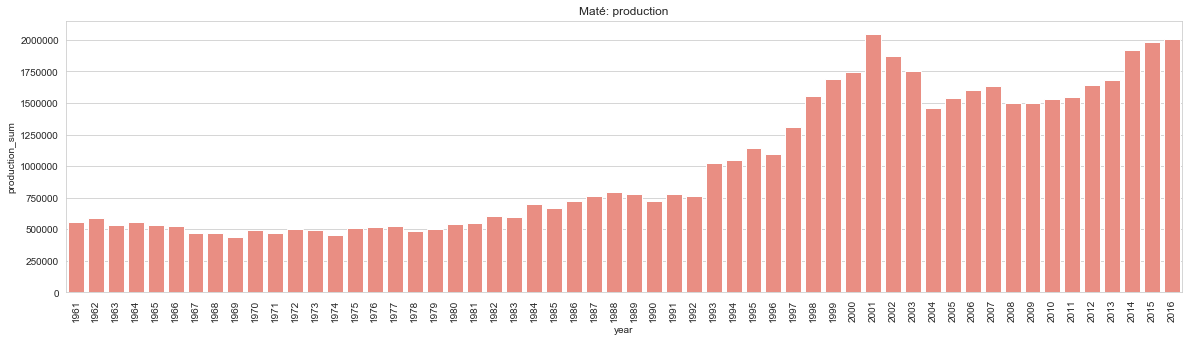

In [59]:
plot_by_year('Maté', 'production')

### Else

In [364]:
set(df_1961[df_1961.area_crops=='World'].item_crops.unique())- set(df_2016[df_2016.area_crops=='World'].item_crops.unique())

{'Fibre Crops Primary', 'Peppermint'}